# Importing Libraries and Data

In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.6.0
Uninstalling scikit-learn-1.6.0:
  Successfully uninstalled scikit-learn-1.6.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 10.8/10.8 MB 22.7 MB/s eta 0:00:01

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 2000)
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, roc_curve, f1_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
sns.set_palette("crest")

In [ ]:
train_data = pd.read_csv('/content/drive/MyDrive/convolve 25/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/convolve 25/test.csv')

# Functions


In [57]:
def print_shape():
  print("Train Data Shape:", train_data.shape)
  print("Validation Data Shape:", test_data.shape)

In [58]:
def print_class(data):
  data = pd.DataFrame(data)
  bad_flag_counts = data['bad_flag'].value_counts(normalize=True)
  sns.barplot(x=bad_flag_counts.index, y=bad_flag_counts.values)
  plt.title("Distribution of bad_flag (Target Variable)")
  plt.xlabel("Bad Flag")
  plt.ylabel("Proportion")
  plt.show()

In [59]:
def apply_pca(dataset, columns, n_comp):

  scaler = StandardScaler()
  scaled_data = scaler.fit_transform(dataset[columns])

  pca = PCA(n_components = n_comp)
  data_pca = pd.DataFrame(pca.fit_transform(scaled_data))
  return data_pca

In [60]:
def print_result(model, X_validation, y_validation):
  y_pred = model.predict(X_validation)
  print("Classification Report:")
  print(classification_report(y_validation, y_pred))

  print(f"Accuracy : {accuracy_score(y_validation, y_pred):.4f}")
  print(f"F1 score : {f1_score(y_validation, y_pred):.4f}")
  y_pred_prob = model.predict_proba(X_validation)[:, 1]
  roc_auc = roc_auc_score(y_validation, y_pred_prob)
  print(f"The ROC AUC Score is : {roc_auc:.4f}")

In [61]:
def plot_roc(model, X_validation, y_validation):
  y_pred_prob = model.predict_proba(X_validation)[:, 1]
  roc_auc = roc_auc_score(y_validation, y_pred_prob)
  fpr, tpr, thresholds = roc_curve(y_validation, y_pred_prob)
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
  plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.grid(True)
  plt.show()

# EDA and Preprocessing


In [62]:
train_data.head()

,account_number,bad_flag,onus_attribute_1,transaction_attribute_1,transaction_attribute_2,transaction_attribute_3,transaction_attribute_4,transaction_attribute_5,transaction_attribute_6,transaction_attribute_7,transaction_attribute_8,transaction_attribute_9,transaction_attribute_10,transaction_attribute_11,transaction_attribute_12,transaction_attribute_13,transaction_attribute_14,transaction_attribute_15,transaction_attribute_16,transaction_attribute_17,transaction_attribute_18,transaction_attribute_19,transaction_attribute_20,transaction_attribute_21,transaction_attribute_22,transaction_attribute_23,transaction_attribute_24,transaction_attribute_25,transaction_attribute_26,transaction_attribute_27,transaction_attribute_28,transaction_attribute_29,transaction_attribute_30,transaction_attribute_31,transaction_attribute_32,transaction_attribute_33,transaction_attribute_34,transaction_attribute_35,transaction_attribute_36,transaction_attribute_37,transaction_attribute_38,transaction_attribute_39,transaction_attribute_40,transaction_attribute_41,transaction_attribute_42,transaction_attribute_43,transaction_attribute_44,transaction_attribute_45,transaction_attribute_46,transaction_attribute_47,transaction_attribute_48,transaction_attribute_49,transaction_attribute_50,transaction_attribute_51,transaction_attribute_52,transaction_attribute_53,transaction_attribute_54,transaction_attribute_55,transaction_attribute_56,transaction_attribute_57,transaction_attribute_58,transaction_attribute_59,transaction_attribute_60,transaction_attribute_61,transaction_attribute_62,transaction_attribute_63,transaction_attribute_64,transaction_attribute_65,transaction_attribute_66,transaction_attribute_67,transaction_attribute_68,transaction_attribute_69,transaction_attribute_70,transaction_attribute_71,transaction_attribute_72,transaction_attribute_73,transaction_attribute_74,transaction_attribute_75,transaction_attribute_76,transaction_attribute_77,transaction_attribute_78,transaction_attribute_79,transaction_attribute_80,transaction_attribute_81,transaction_attribute_82,transaction_attribute_83,transaction_attribute_84,transaction_attribute_85,transaction_attribute_86,transaction_attribute_87,transaction_attribute_88,transaction_attribute_89,transaction_attribute_90,transaction_attribute_91,transaction_attribute_92,transaction_attribute_93,transaction_attribute_94,transaction_attribute_95,transaction_attribute_96,transaction_attribute_97,transaction_attribute_98,transaction_attribute_99,transaction_attribute_100,transaction_attribute_101,transaction_attribute_102,transaction_attribute_103,transaction_attribute_104,transaction_attribute_105,transaction_attribute_106,transaction_attribute_107,transaction_attribute_108,transaction_attribute_109,transaction_attribute_110,transaction_attribute_111,transaction_attribute_112,transaction_attribute_113,transaction_attribute_114,transaction_attribute_115,transaction_attribute_116,transaction_attribute_117,transaction_attribute_118,transaction_attribute_119,transaction_attribute_120,transaction_attribute_121,transaction_attribute_122,transaction_attribute_123,transaction_attribute_124,transaction_attribute_125,transaction_attribute_126,transaction_attribute_127,transaction_attribute_128,transaction_attribute_129,transaction_attribute_130,transaction_attribute_131,transaction_attribute_132,transaction_attribute_133,transaction_attribute_134,transaction_attribute_135,transaction_attribute_136,transaction_attribute_137,transaction_attribute_138,transaction_attribute_139,transaction_attribute_140,transaction_attribute_141,transaction_attribute_142,transaction_attribute_143,transaction_attribute_144,transaction_attribute_145,transaction_attribute_146,transaction_attribute_147,transaction_attribute_148,transaction_attribute_149,transaction_attribute_150,transaction_attribute_151,transaction_attribute_152,transaction_attribute_153,transaction_attribute_154,transaction_attribute_155,transaction_attribute_156,transactio

In [63]:
train_data.describe()

account_number      bad_flag  onus_attribute_1  \
count    96806.000000  96806.000000      7.157500e+04   
mean     48403.500000      0.014173      1.542391e+05   
std      27945.629417      0.118203      1.729925e+05   
min          1.000000      0.000000      2.500000e+04   
25%      24202.250000      0.000000      5.900000e+04   
50%      48403.500000      0.000000      1.000000e+05   
75%      72604.750000      0.000000      1.810000e+05   
max      96806.000000      1.000000      2.800000e+06   

       transaction_attribute_1  transaction_attribute_2  \
count             71575.000000             71575.000000   
mean                  9.570769                 0.002207   
std                1513.967595                 0.119240   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max              398936.791000                25.000000   

       transaction_attribute_3  transaction_attribute_4  \
count             71575.000000             71575.000000   
mean                  4.092854                77.306435   
std                 301.580599              3164.987013   
min                   0.000000           -109800.476600   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max               55000.000000            358986.000000   

       transaction_attribute_5  transaction_attribute_6  \
count             71575.000000             71575.000000   
mean                  0.006315                67.043550   
std                   0.129545              2516.330899   
min                   0.000000             -3498.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                  12.000000            358986.000000   

       transaction_attribute_7  transaction_attribute_8  \
count             71575.000000             71575.000000   
mean                  0.081034                 0.000210   
std                  14.203615                 0.034053   
min                   0.000000                 0.000000   
25%                   0.000000                 0.000000   
50%                   0.000000                 0.000000   
75%                   0.000000                 0.000000   
max                3150.000000                 8.000000   

       transaction_attribute_9  transaction_attribute_10  \
count             71575.000000              71575.000000   
mean                  0.028641                185.067958   
std                   4.783053               2112.031831   
min                   0.000000              -9287.000000   
25%                   0.000000                  0.000000   
50%                   0.000000                  0.000000   
75%                   0.000000                  0.000000   
max                1200.000000             170000.000000   

       transaction_attribute_11  transaction_attribute_12  \
count              71575.000000              71575.000000   
mean                   0.125589                128.223156   
std                    0.825601               1392.113382   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                   44.000000              90000.000000   

       transaction_attribute_13  transaction_attribute_14  \
count              71575.000000              71575.000000   
mean                 317.976934                  0.026029   
std                 5084.747677                  0.208668   
min               -48500.00000

In [64]:
print_shape()

Train Data Shape: (96806, 1216)
Validation Data Shape: (41792, 1215)


In [65]:
transaction_cols = [col for col in train_data.columns if col.startswith('transaction_attribute')]
bureau_cols = [col for col in train_data.columns if col.startswith('bureau')]
bureau_enquiry_cols = [col for col in train_data.columns if col.startswith('bureau_enquiry')]
onus_cols = [col for col in train_data.columns if col.startswith('onus_attribute')]

print(f"Transaction Attributes: {len(transaction_cols)}")
print(f"Bureau Attributes: {len(bureau_cols)}")
print(f"Bureau Enquiry Attributes: {len(bureau_enquiry_cols)}")
print(f"Onus Attributes: {len(onus_cols)}")

Transaction Attributes: 664
Bureau Attributes: 502
Bureau Enquiry Attributes: 50
Onus Attributes: 48


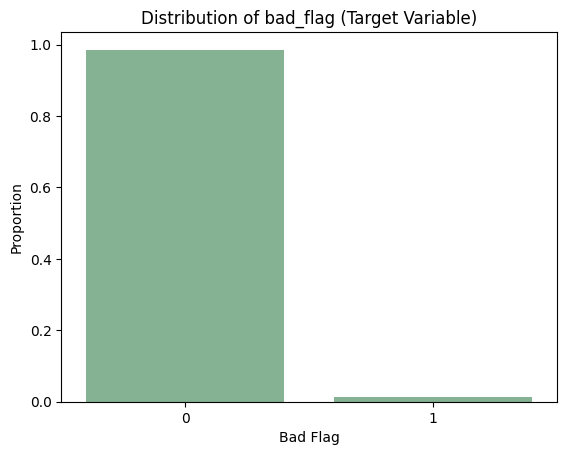

In [66]:
print_class(train_data)

**This graph illustrates the class imblance in the data which should be handled**

**Dropping columns with more than 10% nan values**

In [67]:
null_percentages = train_data.isnull().sum() * 100 / len(train_data)
print("Percentage of null values in each column:")
null_percentages

Percentage of null values in each column:


,0
account_number,0.000000
bad_flag,0.000000
onus_attribute_1,26.063467
transaction_attribute_1,26.063467
transaction_attribute_2,26.063467
...,...
onus_attribute_44,88.006942
onus_attribute_45,88.006942
onus_attribute_46,88.006942
onus_attribute_47,88.006942


In [68]:
train_data = train_data.loc[:, train_data.isna().sum() <= train_data.shape[0]/10]
test_data = test_data.loc[:, test_data.isna().sum() <= test_data.shape[0]/10]
print_shape()

Train Data Shape: (96806, 521)
Validation Data Shape: (41792, 520)


Imputing the numerical columns with the mean value

In [69]:
numerical_cols = train_data.select_dtypes(include=['number']).columns
for col in numerical_cols:
    if train_data[col].isnull().any():
        train_data[col] = train_data[col].fillna(train_data[col].mean())
        test_data[col] = test_data[col].fillna(test_data[col].mean())

In [70]:
columns = train_data.columns.tolist()[2:]

In [71]:
train_pca = apply_pca(train_data, columns, 160)
test_pca = apply_pca(test_data, columns, 160)

**Applying SMOTE to counter the class imblance present in the dataset**

In [72]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(train_pca, train_data['bad_flag'])

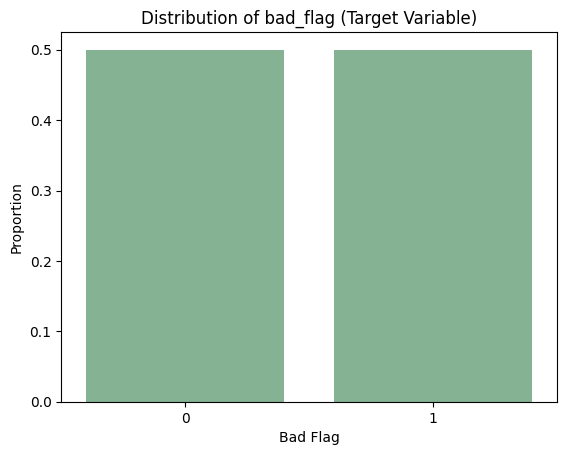

In [73]:
print_class(y_resampled)

In [74]:
X_train, X_validation, y_train, y_validation = train_test_split(X_resampled, y_resampled, test_size = 0.25, random_state = 69)

# Random Forest Classifier

In [22]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_validation)

In [23]:
print_result(rf_classifier, X_validation, y_validation)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     23884
           1       0.99      1.00      1.00     23833

    accuracy                           1.00     47717
   macro avg       1.00      1.00      1.00     47717
weighted avg       1.00      1.00      1.00     47717

Accuracy : 0.9956
F1 score : 0.9956
The ROC AUC Score is : 0.9997


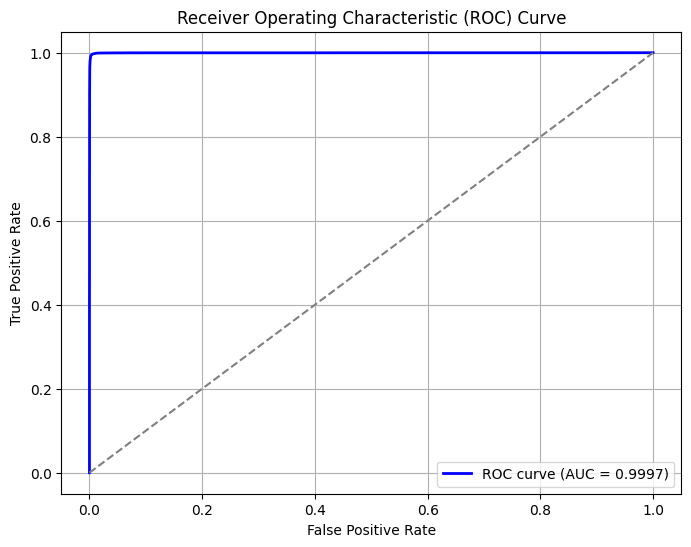

In [24]:
plot_roc(rf_classifier, X_validation, y_validation)

# XGBoost Classifier

In [25]:
xgb_classifier = XGBClassifier(n_estimators = 150, eval_metric='logloss')
xgb_classifier.fit(X_train, y_train)
xgb_pred = xgb_classifier.predict(X_validation)

In [26]:
print_result(xgb_classifier, X_validation, y_validation)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     23884
           1       0.97      1.00      0.99     23833

    accuracy                           0.99     47717
   macro avg       0.99      0.99      0.99     47717
weighted avg       0.99      0.99      0.99     47717

Accuracy : 0.9858
F1 score : 0.9860
The ROC AUC Score is : 0.9992


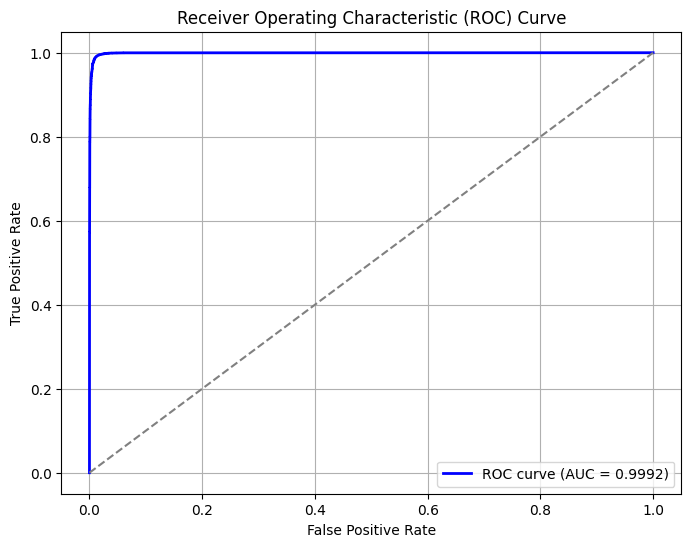

In [27]:
plot_roc(xgb_classifier, X_validation, y_validation)

# MLP Classifier

In [28]:
mlp_classifier = MLPClassifier(max_iter=1000)
mlp_classifier.fit(X_train, y_train)
mlp_pred = mlp_classifier.predict(X_validation)

In [29]:
print_result(mlp_classifier, X_validation, y_validation)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     23884
           1       0.98      1.00      0.99     23833

    accuracy                           0.99     47717
   macro avg       0.99      0.99      0.99     47717
weighted avg       0.99      0.99      0.99     47717

Accuracy : 0.9875
F1 score : 0.9876
The ROC AUC Score is : 0.9963


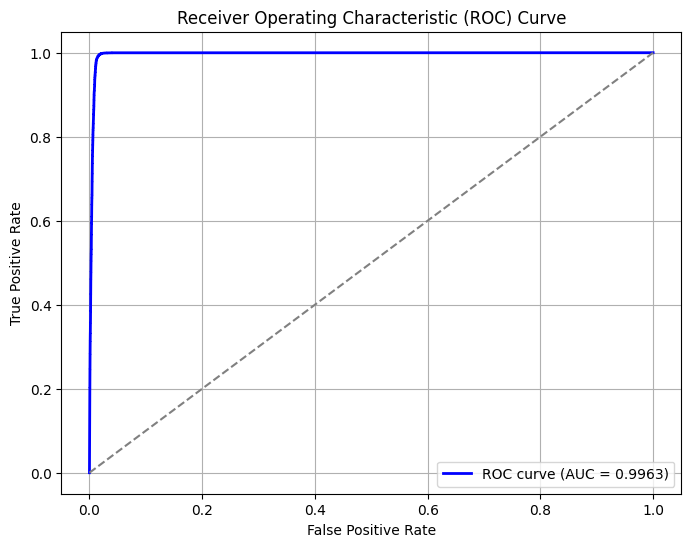

In [30]:
plot_roc(mlp_classifier, X_validation, y_validation)

# Ensemble

In [31]:
base_models = [
    ('randomforest', rf_classifier),
    ('xgboost', xgb_classifier),
    ('mlp', mlp_classifier)
]

In [32]:
voting_clf = VotingClassifier(
    estimators=base_models,
    voting='soft'
)
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_validation)

In [33]:
print_result(voting_clf, X_validation, y_validation)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     23884
           1       0.99      1.00      0.99     23833

    accuracy                           0.99     47717
   macro avg       0.99      0.99      0.99     47717
weighted avg       0.99      0.99      0.99     47717

Accuracy : 0.9941
F1 score : 0.9941
The ROC AUC Score is : 0.9999


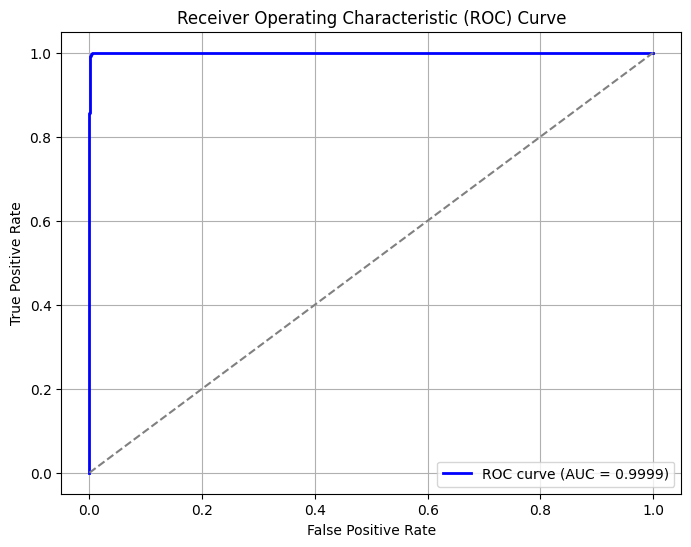

In [34]:
plot_roc(voting_clf, X_validation, y_validation)

In [35]:
test_preds = voting_clf.predict_proba(test_pca)[:, 1]
results = pd.DataFrame({
    'account_number': test_data['account_number'],
    'predicted_probability': test_preds
})
results.to_csv("Team_ARS_prediction.csv", index=False)

In [36]:
results

,account_number,predicted_probability
0,100001,0.740834
1,100002,0.068160
2,100003,0.042386
3,100004,0.090552
4,100005,0.184497
...,...,...
41787,141788,0.053346
41788,141789,0.070870
41789,141790,0.040747
41790,141791,0.126566
